## Chapter 15. 판다스 심화 2

### 15.1. 이동 집계와 누적 집계

#### 15.1.1. 이동 집계(rolling)

In [1]:
# 코드 15-1. 이동 집계와 누적 집계 실습 예제 코드
import pandas as pd
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [2]:
# 코드 15-2. 이동하면서 2개 행의 합을 집계
s.rolling(2).sum()

,0
0,NaN
1,3.0
2,5.0
3,7.0
4,9.0


In [3]:
# 코드 15-3. 이동하면서 2개 행의 평균을 집계
s.rolling(2).mean()

,0
0,NaN
1,1.5
2,2.5
3,3.5
4,4.5


In [4]:
# 코드 15-4. 이동하면서 3개 행의 합을 집계
s.rolling(3).sum()

,0
0,NaN
1,NaN
2,6.0
3,9.0
4,12.0


In [5]:
# 코드 15-5. 최소 관측 수를 1로 지정
s.rolling(3, min_periods=1).sum()

,0
0,1.0
1,3.0
2,6.0
3,9.0
4,12.0


In [6]:
# 코드 15-6. 창의 설정 방식을 가운데로 지정
s.rolling(3, center=True).sum()

,0
0,NaN
1,6.0
2,9.0
3,12.0
4,NaN


#### 15.1.2. 누적 집계(expanding)

In [7]:
# 코드 15-7. expanding 함수로 누적 평균 구하기
s.expanding().mean()

,0
0,1.0
1,1.5
2,2.0
3,2.5
4,3.0


#### 15.1.3. 이동 집계와 누적 집계 심화

In [8]:
# 코드 15-8. 시계열 이동 집계 실습 예제 코드
import pandas as pd
dates = ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-05', '2023-01-10']
df1 = pd.DataFrame({'날짜': pd.to_datetime(dates), '수량': [1, 2, 3, 4, 5]})
df1

,날짜,수량
0,2023-01-01,1
1,2023-01-02,2
2,2023-01-03,3
3,2023-01-05,4
4,2023-01-10,5


In [9]:
# 코드 15-9. 3일 주기로 이동 합 집계
df1.rolling('3d', on='날짜').sum()

,날짜,수량
0,2023-01-01,1.0
1,2023-01-02,3.0
2,2023-01-03,6.0
3,2023-01-05,7.0
4,2023-01-10,5.0


In [10]:
# 코드 15-10. groupby와 이동 집계 실습 예제 코드
data1 = {'이름': ['A', 'A', 'A', 'B', 'B', 'B'],
         '수량':[1, 2, 3, 4, 5, 6]}
df2 = pd.DataFrame(data1)
df2

,이름,수량
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6


In [11]:
# 코드 15-11. 이름으로 그룹을 나눠 이동 집계
df2.groupby('이름').rolling(2)['수량'].sum()

이름   
A   0     NaN
    1     3.0
    2     5.0
B   3     NaN
    4     9.0
    5    11.0
Name: 수량, dtype: float64

In [12]:
# 코드 15-12. 결과를 열로 생성하기
df2['이동_합'] = df2.groupby('이름').rolling(2)['수량'].sum().droplevel(0)
df2

,이름,수량,이동_합
0,A,1,NaN
1,A,2,3.0
2,A,3,5.0
3,B,4,NaN
4,B,5,9.0
5,B,6,11.0


### 15.2. 카테고리 자료형

### 15.2.1. 카테고리 자료형을 사용하는 이유

In [13]:
# 코드 15-13. 카테고리 자료형 실습 예제 코드
import pandas as pd
import numpy as np
pd.options.display.max_rows = 6
np.random.seed(0) # 시드 고정
data = {'종류': np.random.choice(['바지', '셔츠', '코트'], 1000000),
        '사이즈': np.random.choice(['S', 'M', 'L', 'XL'], 1000000)}
df = pd.DataFrame(data)
df

,종류,사이즈
0,바지,M
1,셔츠,L
2,바지,M
...,...,...
999997,코트,S
999998,셔츠,S
999999,바지,L


In [14]:
# 코드 15-14. 메모리 사용량 확인
df.memory_usage()

,0
Index,128
종류,8000000
사이즈,8000000


In [15]:
# 코드 15-15. 카테고리 자료형으로 변환 후 메모리 사용량 확인
df.astype('category').memory_usage()

,0
Index,128
종류,1000132
사이즈,1000204


#### 15.2.2. 카테고리 자료형으로 변환하기

In [16]:
# 코드 15-16. 카테고리 자료형 변환 실습 예제 코드
import pandas as pd
data1 = {'종류': ['바지', '셔츠', '양말', '셔츠', '셔츠', '모자'],
         '사이즈': ['S', 'XL', 'L', 'S', 'M', 'S']}
df1 = pd.DataFrame(data1)
df1

,종류,사이즈
0,바지,S
1,셔츠,XL
2,양말,L
3,셔츠,S
4,셔츠,M
5,모자,S


In [17]:
# 코드 15-17. 종류 열을 카테고리 자료형으로 변환(astype)
df1['종류'].astype('category')

,종류
0,바지
1,셔츠
2,양말
3,셔츠
4,셔츠
5,모자


In [18]:
# 코드 15-18. 사이즈 열을 카테고리 자료형으로 변환(Categorical)
pd.Categorical(df1['사이즈'], categories=['S', 'M', 'L', 'XL'], ordered=True)

['S', 'XL', 'L', 'S', 'M', 'S']
Categories (4, object): ['S' < 'M' < 'L' < 'XL']

In [19]:
# 코드 15-19. 사이즈 열을 카테고리 자료형으로 변환하고 정렬하기
df1['사이즈'] = pd.Categorical(
    df1['사이즈'], categories=['S', 'M', 'L', 'XL'], ordered=True
)
df1.sort_values(['종류', '사이즈'])

,종류,사이즈
5,모자,S
0,바지,S
3,셔츠,S
4,셔츠,M
1,셔츠,XL
2,양말,L


In [20]:
# 코드 15-20. 종류 열을 바지, 셔츠로 범주화하기
pd.Categorical(df1['종류'], categories=['바지', '셔츠'], ordered=True)

['바지', '셔츠', NaN, '셔츠', '셔츠', NaN]
Categories (2, object): ['바지' < '셔츠']

In [21]:
# 코드 15-21. 종류 열을 바지, 셔츠, 기타로 범주화하기
df1['종류'] = pd.Categorical(
    df1['종류'], categories=['바지', '셔츠', '기타'], ordered=True
    ).fillna('기타')
df1

,종류,사이즈
0,바지,S
1,셔츠,XL
2,기타,L
3,셔츠,S
4,셔츠,M
5,기타,S


#### 15.2.3. 카테고리 자료형의 다양한 메서드

In [22]:
# 코드 15-22. 카테고리 자료형에 다양한 메서드 적용 실습 예제 코드
import pandas as pd
data2 = {'종류': ['바지', '셔츠', '기타', '셔츠', '셔츠', '기타'],
         '사이즈': ['S', 'XL', 'L', 'S', 'M', 'S']}
df2 = pd.DataFrame(data2).astype('category')

df2['사이즈'] = pd.Categorical(
    df2['사이즈'], categories=['S', 'M', 'L', 'XL'], ordered=True
)
df2

,종류,사이즈
0,바지,S
1,셔츠,XL
2,기타,L
3,셔츠,S
4,셔츠,M
5,기타,S


In [23]:
# 코드 15-23. 사이즈 열의 범주 확인
df2['사이즈'].cat.categories

Index(['S', 'M', 'L', 'XL'], dtype='object')

In [24]:
# 코드 15-24. 사이즈 열 인코딩
df1['사이즈'].cat.codes

,0
0,0
1,3
2,2
3,0
4,1
5,0


In [25]:
# 코드 15-25. 사이즈 열에 새로운 범주 추가하기
df1['사이즈'].cat.add_categories('기타')

,사이즈
0,S
1,XL
2,L
3,S
4,M
5,S


In [26]:
# 코드 15-26. 종류 열에 순서 부여하기(as_ordered)
df1['종류'].cat.as_ordered()

,종류
0,바지
1,셔츠
2,기타
3,셔츠
4,셔츠
5,기타


In [27]:
# 코드 15-27. 종류 열에 순서 부여하기(reorder_categories)
df1['종류'].cat.reorder_categories(['기타', '셔츠', '바지'], ordered=True)

,종류
0,바지
1,셔츠
2,기타
3,셔츠
4,셔츠
5,기타


In [28]:
# 코드 15-28. 종류 열에 순서 부여하기(Categorical)
pd.Categorical(df1['종류'], categories=['기타', '셔츠', '바지'], ordered=True)

['바지', '셔츠', '기타', '셔츠', '셔츠', '기타']
Categories (3, object): ['기타' < '셔츠' < '바지']

### 15.3. 시각화


#### 15.3.1. 색상

In [29]:
# 코드 15-29. 색상 지정 실습 예제 코드
import pandas as pd
data = [[1, 2], [2, 3], [4, 1]]
df = pd.DataFrame(data, index=['A', 'B', 'C'], columns=['col1', 'col2'])
df

,col1,col2
A,1,2
B,2,3
C,4,1


<Axes: >

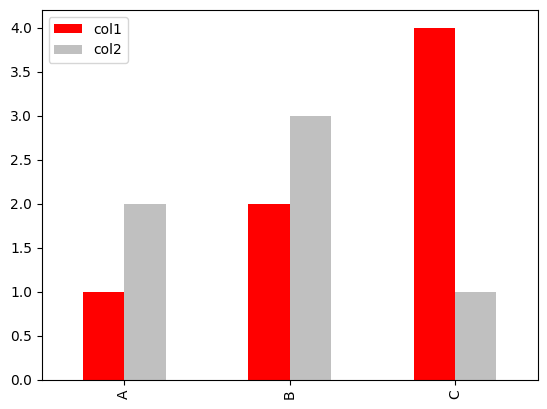

In [30]:
# 코드 15-30. 색상을 빨간색과 은색으로 지정
df.plot(kind='bar', color=['r', 'silver'])

<Axes: >

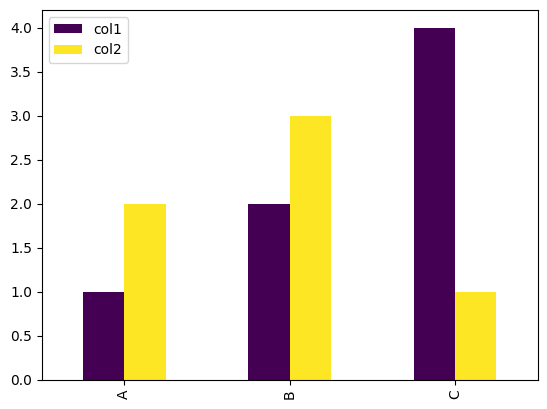

In [31]:
# 코드 15-31. 색상을 팔레트 viridis로 지정
df.plot(kind='bar', colormap='viridis')

In [32]:
# 코드 15-32. 색상 팔레트에서 색상 추출
import seaborn as sns
# 팔레트 viridis에서 10개의 색상 추출
colors = sns.color_palette('viridis', 10)
colors

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

<Axes: >

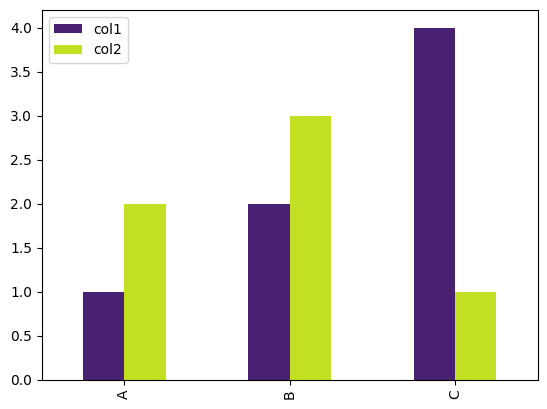

In [33]:
# 코드 15-33. 변수 colors의 첫 번째 색상과 마지막 색상으로 시각화
df.plot(kind='bar', color=[colors[0], colors[-1]])

#### 15.3.2. plot 함수의 매개변수

<Axes: title={'center': 'title'}, xlabel='xlabel', ylabel='ylabel'>

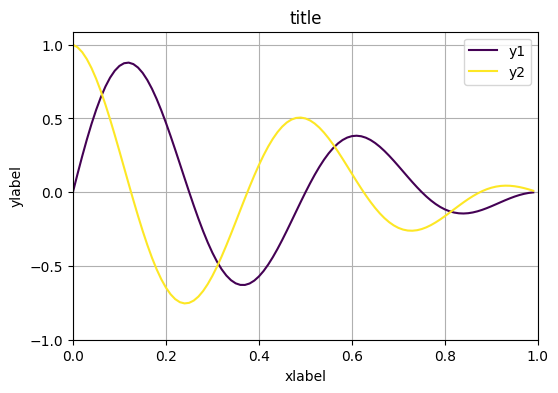

In [34]:
# 코드 15-34. plot 함수의 주요 매개변수 실습

# 데이터 생성
import pandas as pd
import numpy as np

x = pd.RangeIndex(100) / 100 # 0부터 0.99 까지 0.01의 등차수열
y1 = np.sin(4 * 3.14 * x) * (1 - x) # sin 함수를 포함한 연산
y2 = np.cos(4 * 3.14 * x) * (1 - x) # cos 함수를 포함한 연산
df1 = pd.DataFrame({'x': x, 'y1': y1, 'y2': y2})

# 그래프 생성
df1.plot(x='x', y=['y1', 'y2'], kind='line', figsize=(6, 4), title='title',
         legend=True, grid=True, xlabel='xlabel', ylabel='ylabel',
         xlim=(0, 1), yticks=[-1, -0.5, 0, 0.5, 1], colormap='viridis'
)

In [35]:
# 코드 15-35. matplotlib의 테마 확인
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='x'>

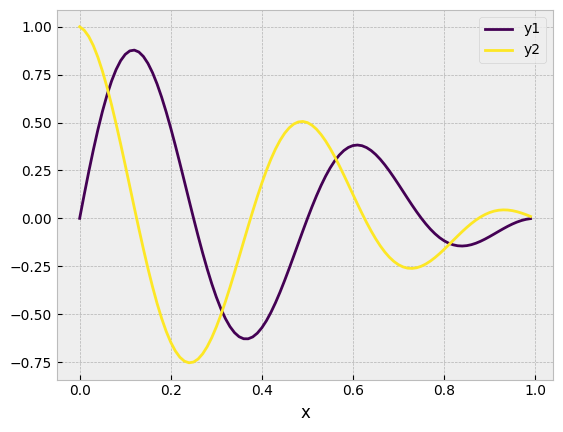

In [36]:
# 코드 15-36. matplotlib으로 bmh 테마를 설정 후 plot으로 시각화
plt.style.use('bmh')
df1.plot(x='x', colormap='viridis')

<Axes: xlabel='x'>

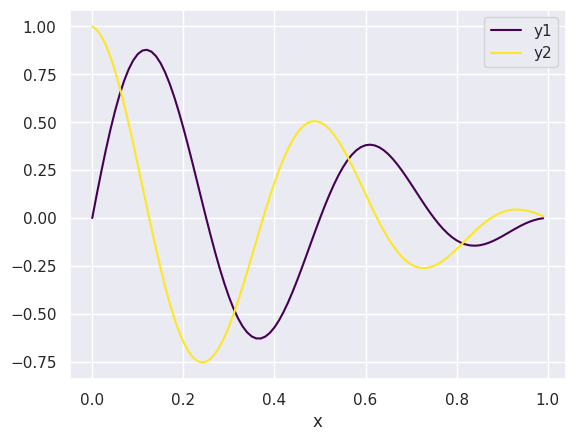

In [37]:
# 코드 15-37. seaborn으로 darkgrid 테마를 설정 후 plot으로 시각화
import seaborn as sns
sns.set_theme(style='darkgrid')
df1.plot(x='x', colormap='viridis')

#### 15.3.3. 영역을 분할해 하위 그래프 생성하기


array([[<Axes: xlabel='x'>, <Axes: xlabel='x'>]], dtype=object)

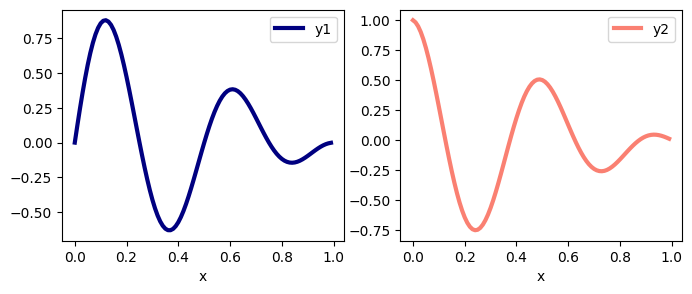

In [38]:
# 코드 15-38. 판다스 plot 함수로 하위 그래프(subplots) 생성하기
import matplotlib.pyplot as plt
plt.style.use('default') # style을 기본값으로

# 그래프 생성
df1.plot(x='x', y=['y1', 'y2'], subplots=True, layout=(1, 2),
         figsize=(8, 3), color=['navy', 'salmon'], lw=3
)

<Axes: xlabel='x'>

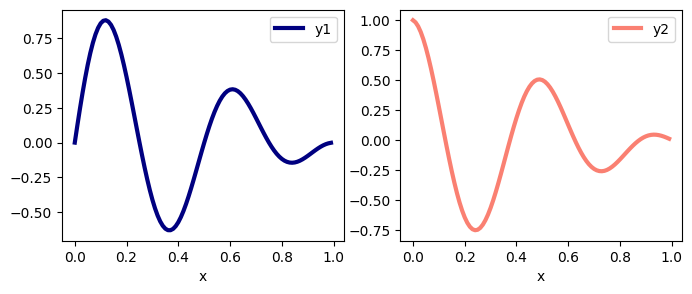

In [39]:
# 코드 15-39. matplotlib으로 하위 그래프(subplots) 생성하기
# axes는 1행 2열, 전체 figure는 크기가 8 inch × 3 inch의 하위 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# 판다스 plot으로 그래프를 그릴 영역을 매개변수 ax로 지정
df1.plot(x='x', y='y1', ax=axes[0], lw=3, color='navy')
df1.plot(x='x', y='y2', ax=axes[1], lw=3, color='salmon')

### 15.4. 판다스 팁

#### 15.4.1. 과학적 표기법


In [40]:
# 코드 15-40. 유효숫자 세 자리의 과학적 표기법
import pandas as pd
pd.options.display.float_format = '{:.2e}'.format
s = pd.Series([1.12, 2342, 33])
s

,0
0,1.12e+00
1,2.34e+03
2,3.30e+01


#### 15.4.2. 자릿수마다 쉼표로 구분하기

In [41]:
# 코드 15-41. 자릿수마다 쉼표로 구분하기
pd.options.display.float_format = '{:,}'.format
s

,0
0,1.12
1,"2,342.0"
2,33.0


In [42]:
# 코드 15-42. 소수점 처리 출력 옵션 리셋하기
pd.options.display.float_format = None

In [43]:
# 코드 15-43. 수치형 데이터를 자릿수가 구분된 문자열로 변환하기
s.map('{:,}'.format)

,0
0,1.12
1,"2,342.0"
2,33.0


#### 15.4.3. 소수를 백분율로 표현하기

In [44]:
# 코드 15-44. 수치형 데이터를 %로 표기된 문자열로 변환하기
s1 = pd.Series([0.1, 0.2, 0.452])
s1.map('{:.2%}'.format)

,0
0,10.00%
1,20.00%
2,45.20%


#### 15.4.4. 엑셀 파일의 모든 시트 한 번에 합치기

In [45]:
# 코드 15-45. 엑셀 파일의 모든 시트를 데이터 프레임의 딕셔너리로 생성하기
import pandas as pd
url1 = 'https://github.com/panda-kim/book1/blob/main/25sheet.xlsx?raw=true'
dfs = pd.read_excel(url1, sheet_name=None)
dfs

{'1반':     이름  국어  영어
 0  김판다  63  93
 1  강승주  89  83,
 '2반':     이름  국어  영어
 0  조민영  83  76
 1  최진환  94  88,
 '3반':     이름  국어  영어
 0  박연준  58  91
 1  안지선  77  49}

In [46]:
# 코드 15-46. 딕셔너리를 튜플로 변환하는 items 함수
dict1 = {'key1': 'val1', 'key2': 'val2', 'key3': 'val3'}
dict1.items()

dict_items([('key1', 'val1'), ('key2', 'val2'), ('key3', 'val3')])

In [47]:
# 코드 15-47. 엑셀의 모든 시트를 하나로 연결하기
df = pd.concat([sheet for name, sheet in dfs.items()])
df

,이름,국어,영어
0,김판다,63,93
1,강승주,89,83
0,조민영,83,76
1,최진환,94,88
0,박연준,58,91
1,안지선,77,49


In [48]:
# 코드 15-48. 시트명을 열로 생성하고 모든 시트 하나로 연결하기
df1 = pd.concat([sheet.assign(반=name) for name, sheet in dfs.items()])
df1

,이름,국어,영어,반
0,김판다,63,93,1반
1,강승주,89,83,1반
0,조민영,83,76,2반
1,최진환,94,88,2반
0,박연준,58,91,3반
1,안지선,77,49,3반


#### 15.4.5. 하나의 데이터 프레임을 그룹으로 시트를 나누어 엑셀 파일로 저장하기

In [49]:
# 코드 15-49. 반으로 시트를 분리해 하나의 엑셀 파일로 저장하기
with pd.ExcelWriter('ch15_sheet.xlsx') as writer:
    for key, d in df1.groupby('반'):
        d.to_excel(writer, sheet_name=key, index=False)

#### 15.4.5. 불리언 인덱싱에 lambda 함수 입력하기

In [50]:
# 코드 15-50. 불리언 인덱싱에 lambda 함수 입력하기
df1.reset_index(drop=True)[lambda x: x['반'].eq('2반')]

,이름,국어,영어,반
2,조민영,83,76,2반
3,최진환,94,88,2반


#### 15.4.7. rename 함수에 lambda 함수를 적용해 열 이름 변경하기


In [51]:
# 코드 15-51. 실습 예제 코드
import pandas as pd
data = {'학생코드': ['A-003', 'B-002', 'C-001', 'D-004'],
        '1차': [50, 70, 90, 70], '2차': [60, 80, 80, 60]}
df = pd.DataFrame(data)
df

,학생코드,1차,2차
0,A-003,50,60
1,B-002,70,80
2,C-001,90,80
3,D-004,70,60


In [52]:
# 코드 15-52. 열 이름에 '차'가 존재하면 접미어로 점수를 추가
df.rename(lambda x: x + '점수' if '차' in x else x, axis=1)

,학생코드,1차점수,2차점수
0,A-003,50,60
1,B-002,70,80
2,C-001,90,80
3,D-004,70,60


#### 15.4.8. 정렬의 기준에 함수를 적용해 정렬하기(매개변수 key)

In [53]:
# 코드 15-53. 학생코드 열에서 하이픈(-) 이후 부분 추출하기
df['학생코드'].str.split('-').str[1]

,학생코드
0,003
1,002
2,001
3,004


In [54]:
# 코드 15-54. 학생코드 열에서 하이픈(-) 이후 부분을 기준으로 정렬하기
df.sort_values('학생코드', key=lambda x: x.str.split('-').str[1])

,학생코드,1차,2차
2,C-001,90,80
1,B-002,70,80
0,A-003,50,60
3,D-004,70,60


#### 15.4.9. 정규 표현식의 캡처 그룹으로 문자열의 위치 교환하기

In [55]:
# 코드 15-55. 학생코드 열에서 하이픈 전후의 문자열을 맞교환
df['학생코드'].str.replace(r'(.+)-(\d+)', r'\2-\1', regex=True)

,학생코드
0,003-A
1,002-B
2,001-C
3,004-D


In [56]:
# 코드 15-56. 시리즈 s에서 하이픈이 존재하면 하이픈 전후의 문자열을 맞교환
s = pd.Series(['A-003', 'B-002', 'C001', 'D-004'])
s.str.replace(r'(.+)-(\d+)', r'\2-\1', regex=True)

,0
0,003-A
1,002-B
2,C001
3,004-D


#### 15.4.10. 파이썬의 join 함수로 정규 표현식 패턴 생성하기

In [57]:
# 코드 15-57. 학생코드 열이 문자 A, B, C를 포함하는지 확인
df['학생코드'].str.contains(r'A|B|C')

,학생코드
0,True
1,True
2,True
3,False


In [58]:
# 코드 15-58. join 함수로 정규 표현식 패턴 생성하기
target = ['A', 'B', 'C']
pat = r'|'.join(target)
pat

'A|B|C'

#### 15.4.11. 시리즈나 데이터 프레임을 역순으로 변환하기

In [59]:
# 코드 15-59. 시리즈 s를 역순으로 변환하기
s = pd.Series([1, 2, 3, 4])
s[::-1]

,0
3,4
2,3
1,2
0,1


#### 15.4.12. 오브젝트 열 내에서 개별 원소의 자료형 파악하기


In [60]:
# 코드 15-60. 오브젝트 시리즈의 개별 원소 자료형 파악하기
s1 = pd.Series(['A', 'B', 'A', float('nan'), 'A'])
s1.map(type).astype('str').value_counts()

,count
<class 'str'>,4
<class 'float'>,1


In [61]:
# 코드 15-61. null 여부와 개별 원소 자료형 함께 파악하기
pd.crosstab(s1.map(type).astype('str'), s1.isna())

col_0,False,True
row_0,,
<class 'float'>,0,1
<class 'str'>,4,0


#### 15.4.13. 비중이 낮은 범주를 통합하기

In [62]:
# 코드 15-62. 비중이 낮은 범주를 통합하기 위한 실습 예제 코드
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리 출력
s1 = pd.Series(['A', 'B', 'A', 'A', 'C', 'D'])
s1

,0
0,A
1,B
2,A
3,A
4,C
5,D


In [63]:
# 코드 15-63. 각 범주의 비중 파악하기
s2 = s1.value_counts(normalize=True)
s2

,proportion
A,0.500
B,0.167
C,0.167
D,0.167


In [64]:
# 코드 15-64. replace 함수로 20% 미만의 범주를 기타로 통합
s2 = s1.value_counts(normalize=True)
target1 = s2[s2 < 0.2].index
s1.replace(target1, '기타')

,0
0,A
1,기타
2,A
3,A
4,기타
5,기타


In [65]:
# 코드 15-65. 카테고리 자료형으로 변환하면서 20% 미만의 범주를 기타로 통합
target2 = s2[s2 >= 0.2].index.tolist()
pd.Categorical(
    s1, categories=target2 + ['기타'], ordered=True
    ).fillna('기타')

['A', '기타', 'A', 'A', '기타', '기타']
Categories (2, object): ['A' < '기타']

#### 15.4.14. map 함수로 멀티 인덱스를 단일 인덱스로 변환하기

In [66]:
# 코드 15-66. 단일 인덱스로 변환 실습 예제 코드
import pandas as pd
cols = pd.MultiIndex.from_product([['A', 'B'], ['가격', '수량']])
df = pd.DataFrame([[1000, 2, 2000, 3], [1000, 3, 2200, 4]], columns=cols)
df

A        B   
     가격 수량    가격 수량
0  1000  2  2000  3
1  1000  3  2200  4

In [67]:
# 코드 15-67. map 함수로 멀티 인덱스를 단일 인덱스로 변환하기
df.columns.map('_'.join)

Index(['A_가격', 'A_수량', 'B_가격', 'B_수량'], dtype='object')

In [68]:
# 코드 15-68. 데이터 프레임을 단일 인덱스로 변경하기
df.set_axis(df.columns.map('_'.join), axis=1)

,A_가격,A_수량,B_가격,B_수량
0,1000,2,2000,3
1,1000,3,2200,4


#### 15.4.15. cummin과 cummax 함수로 특정 시점 기준으로 필터링

In [69]:
# 코드 15-69. cummin과 cummax 실습 예제 코드
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format # 소수점 첫째 자리 출력
s1 = pd.Series([1500, 2500, 3500, 1500, 1000])
s1

,0
0,1500
1,2500
2,3500
3,1500
4,1000


In [70]:
# 코드 15-70. 각 셀이 처음 3000원을 돌파한 이후의 데이터인지 확인
s1.ge(3000).cummax()

,0
0,False
1,False
2,True
3,True
4,True


In [71]:
# 코드 15-71. 처음 3000원을 돌파한 이후의 주가의 평균
s1.where(s1.gt(3000).cummax()).mean()

2000.0

In [72]:
# 코드 15-72. 시작부터 연속된 NaN 제거하기 실습 예제 코드 생성
s2 = pd.Series([None, None, 3500, None, 1000, None])
s2

,0
0,NaN
1,NaN
2,3500.0
3,NaN
4,1000.0
5,NaN


In [73]:
# 코드 15-73. 각 셀이 시작부터 연속된 NaN인지 확인하기
s2.isna().cummin()

,0
0,True
1,True
2,False
3,False
4,False
5,False


In [74]:
# 코드 15-74. 시작부터 연속된 NaN만 제거하기
s2[~s2.isna().cummin()]

,0
2,3500.0
3,NaN
4,1000.0
5,NaN


#### 15.4.16. NaN이 아닌 첫 번째 값 반환하기

In [75]:
# 코드 15-75. NaN이 아닌 첫 번째 값 반환하기
s2.bfill().iloc[0]

3500.0

In [76]:
# 코드 15-76. NaN이 아닌 마지막 값 반환하기
s2.ffill().iloc[-1]

1000.0

In [77]:
# 코드 15-77. 2000보다 큰 첫 번째 값 반환하기
s1.where(s1 > 2000).bfill().iloc[0]

2500.0

#### 15.4.17. 셀 안의 리스트와 딕셔너리를 별도의 열로 확장하기


In [78]:
# 코드 15-78. 셀 안의 리스트와 딕셔너리를 새로운 열로 확장 실습 예제 코드
import pandas as pd
s1 = pd.Series([[1, 2, 3], [4, 5, 6], [7, 8]])
s2 = pd.Series([{'col1': 1, 'col2': 2}, {'col2': 3}, {'col2': 4, 'col1': 5}])

In [79]:
# 코드 15-79. 셀 안의 리스트를 새로운 열로 확장하기
pd.DataFrame(s1.tolist())

,0,1,2
0,1,2,3.0
1,4,5,6.0
2,7,8,NaN


In [80]:
# 코드 15-80. 셀 안의 딕셔너리를 새로운 열로 확장하기
pd.json_normalize(s2)

,col1,col2
0,1.0,2
1,NaN,3
2,5.0,4


#### 15.4.18. 수치형 데이터인 열만 집계하기


In [81]:
# 코드 15-81. 실습 예제 코드
import pandas as pd
data = {'이름': ['김판다', '강승주', '조민영', '최진환'],
        '팀': ['운용', '주식', '주식', '주식'],
        'A종목': [10, 20, 30, 40],
        'B종목': [50, 60, 70, 80]}
df = pd.DataFrame(data)
df

,이름,팀,A종목,B종목
0,김판다,운용,10,50
1,강승주,주식,20,60
2,조민영,주식,30,70
3,최진환,주식,40,80


In [82]:
# 코드 15-82. 팀으로 그룹을 나누어 수치형 데이터인 모든 열의 합 집계하기
df.groupby('팀').sum(numeric_only=True)

,A종목,B종목
팀,,
운용,10,50
주식,90,210


#### 15.4.19. 그룹마다 소계를 집계한 행 생성하기

In [83]:
# 코드 15-83. 팀별로 소계를 집계한 행 생성하기
# 데이터 프레임의 최상위에 합계를 집계한 행을 추가하는 사용자 정의 함수
def subtotal(d):
    d.loc[-1] = d.sum(numeric_only=True)
    return d.sort_index()

# df에 subtotal 함수 적용하고 출력해 함수 subtotal의 기능 확인
print(subtotal(df))


# subtotal 함수를 그룹마다 적용해 소계를 생성하고, 결측값 대체
(df.groupby('팀', sort=False, group_keys=False).apply(subtotal)
   .reset_index(drop=True)
   .assign(이름=lambda x: x['이름'].fillna('소계'),
           팀=lambda x: x['팀'].bfill())
)

     이름    팀   A종목   B종목
-1  NaN  NaN 100.0 260.0
 0  김판다   운용  10.0  50.0
 1  강승주   주식  20.0  60.0
 2  조민영   주식  30.0  70.0
 3  최진환   주식  40.0  80.0


,이름,팀,A종목,B종목
0,소계,운용,10.0,50.0
1,김판다,운용,10.0,50.0
2,소계,주식,90.0,210.0
3,강승주,주식,20.0,60.0
4,조민영,주식,30.0,70.0
5,최진환,주식,40.0,80.0


#### 15.4.20. 복수의 열을 순서와 상관없이 동일한 그룹을 설정해 그룹화하기

In [84]:
# 코드 15-84. 순서와 상관없이 동일한 그룹화 실습 예제 코드
import pandas as pd
import numpy as np
data1 = {'선택1': ['지학', '화학', '물리', '생물', '물리'],
         '선택2': ['생물', '물리', '화학', '지학', '화학'],
         '점수': [40, 50, 60, 70, 70]}
df1 = pd.DataFrame(data1)
df1

,선택1,선택2,점수
0,지학,생물,40
1,화학,물리,50
2,물리,화학,60
3,생물,지학,70
4,물리,화학,70


In [85]:
# 코드 15-85. 선택1과 선택2 순서와 관계없이 그룹화해서 평균점수 구하기
df2 = df1.copy() # df1을 복제한 df2
# df1의 선택1과 선택2를 행마다 정렬을 수행해 배정한다.
df2[['선택1', '선택2']] = np.sort(df2[['선택1', '선택2']])
df2.groupby(['선택1', '선택2'])['점수'].mean()

,,점수
선택1,선택2,
물리,화학,60.0
생물,지학,55.0


In [86]:
# 코드 15-86. 기존 데이터를 변경하지 않고 그루퍼 사용하기
# 그루퍼 생성
grp = np.sort(df1[['선택1', '선택2']]).T.tolist()
df1.groupby(grp)['점수'].mean()

,,점수
물리,화학,60.0
생물,지학,55.0


#### 15.4.21. 엑셀의 날짜 데이터를 숫자로 불러올 때 datetime으로 변환하기


In [87]:
# 코드 15-87. 숫자 데이터를 날짜로 변환 실습 예제 코드
import pandas as pd
s = pd.Series([44929, 45060])
s

,0
0,44929
1,45060


In [88]:
# 코드 15-88. 기준일과 단위를 지정해 숫자를 datetime으로 변환하기
s1 = pd.to_datetime(s, unit='D', origin='1899-12-30')
s1

,0
0,2023-01-03
1,2023-05-14


#### 15.4.22. 기간의 마지막 날짜와의 차이 구하기

In [89]:
# 코드 15-89. 각 셀이 속한 분기의 마지막 날짜 구하기
s1.dt.to_period('Q').dt.to_timestamp('Q')

,0
0,2023-03-31
1,2023-06-30


In [90]:
# 코드 15-90. 속한 분기의 마지막 날짜와의 차이 구하기
s1.dt.to_period('Q').dt.to_timestamp('Q') - s1

,0
0,87 days
1,47 days


In [91]:
# 코드 15-91. offsets 함수로 각 셀이 속한 분기의 마지막 날짜 구하기
s1 + pd.offsets.QuarterEnd()

,0
0,2023-03-31
1,2023-06-30


#### 15.4.23. 시계열 주기로 데이터 이동하기

In [92]:
# 코드 15-92. shift 함수에 시계열 주기 입력 실습 예제 코드
date = ['2024-05-01', '2024-05-03', '2024-05-04']
s = pd.Series([1, 2, 3], index=pd.to_datetime(date))
s

,0
2024-05-01,1
2024-05-03,2
2024-05-04,3


In [93]:
# 코드 15-93. 시계열 주기 '2D'만큼 데이터 이동하기
s.shift(freq='2D')

,0
2024-05-03,1
2024-05-05,2
2024-05-06,3


#### 15.4.24. 구간 인덱스로 범주화하기

In [94]:
# 코드 15-94. 구간 인덱스로 범주화 실습 예제 코드
import pandas as pd
data1 = {'날짜': pd.date_range('2025-01-03', periods=6, freq='20D'),
         '구매량': [10, 20, 30, 40, 50, 60]}
data2 = {'시작': pd.to_datetime(['2025-01-01', '2025-02-01', '2025-03-03']),
         '종료': pd.to_datetime(['2025-01-10', '2025-02-15', '2025-03-27']),
         '할인': ['새해할인', '1주년할인', '신학기할인']}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df1

,날짜,구매량
0,2025-01-03,10
1,2025-01-23,20
2,2025-02-12,30
3,2025-03-04,40
4,2025-03-24,50
5,2025-04-13,60


In [95]:
# 코드 15-95. 구간 인덱스로 범주화하기
idx = pd.IntervalIndex.from_arrays(df2['시작'], df2['종료'], closed='both')
df1['할인'] = pd.cut(df1['날짜'], bins=idx).map(df2['할인'].set_axis(idx))
df1

,날짜,구매량,할인
0,2025-01-03,10,새해할인
1,2025-01-23,20,NaN
2,2025-02-12,30,1주년할인
3,2025-03-04,40,신학기할인
4,2025-03-24,50,신학기할인
5,2025-04-13,60,NaN


#### 15.4.25. 인덱스의 데이터를 사용해 apply 함수 적용하기

In [96]:
# 코드 15-96. 인덱스의 데이터를 사용해 apply 함수 실습 예제 코드
import pandas as pd
data = {'국어': {'A': 62, 'B': 84, 'C': 74},
        '영어': {'A': 65, 'B': 76, 'C': 79},
        '수학': {'A': 68, 'B': 80, 'C': 95}}
df = pd.DataFrame(data)
df

,국어,영어,수학
A,62,65,68
B,84,76,80
C,74,79,95


In [97]:
# 코드 15-97. A 행을 시리즈로 출력
df.loc['A']

,A
국어,62
영어,65
수학,68


In [98]:
# 코드 15-98. 인덱스의 데이터를 사용해 apply 함수 적용하기
df.apply(lambda x: print(f'{x.name}: {x.idxmax()}의 {x.max()}점'), axis=1);

A: 수학의 68점
B: 국어의 84점
C: 수학의 95점


In [99]:
# 코드 15-99. 인덱스의 데이터로 for 문 활용하기(iterrows)
for idx, row in df.iterrows():
    print(f'{idx}: {row.idxmax()}의 {row.max()}점')

A: 수학의 68점
B: 국어의 84점
C: 수학의 95점
